In [1]:
import sys
sys.path.append('..')

%reload_ext autoreload
%autoreload 2
# %aimport sponge_networks
# %aimport sponge_networks.utils

In [2]:
import sponge_networks as sn

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 7)
plt.rcParams["axes.grid"] = True
plt.rcParams["font.size"] = 12
%matplotlib inline

import numpy as np
import networkx as nx
import scipy
import cairosvg
import imageio
import pandas as pd
from IPython.lib import pretty
from toolz import *
from typing import Protocol
# import abc

# import plotly.graph_objs as go
# import plotly.express as px

from scipy.linalg import null_space

## Layouts

In [7]:
nw = sn.build_sponge_network(
    sn_type="hexagonal", n_cols=3, n_rows=4,
    layout={
        "weights_sink_edge": 1,
        "weights_loop": 1,
        "weights_horizontal": 4,
        "weights_up_down": 5,
        "weights_down_up": 1,
    },
    generate_sinks=False,
)

In [9]:
sim = nw.run_sponge_simulation([50, 20], n_iters=100)
nw.plot_simulation(sim, scale=1.)

interactive(children=(IntSlider(value=0, description='№ of iteration', max=99), Output()), _dom_classes=('widg…

In [5]:
sim.to_excel("lala.xlsx")

In [90]:
it = sim.simple_protocol()
it.sum(axis=1)

t
0     60.0
1     60.0
2     60.0
3     60.0
4     60.0
      ... 
95    60.0
96    60.0
97    60.0
98    60.0
99    60.0
Length: 100, dtype: float64

In [21]:
gr = rn.grid_with_positions(3, 4, grid_type="grid_2d")
nw = rn.ResourceNetworkGreedy(gr)
sim = nw.run_simulation(np.random.randint(0, 2, size=len(nw)), n_iters=3)
rn.plot_simulation(nw, sim, scale=1.4)

interactive(children=(IntSlider(value=0, description='№ of iteration', max=2), Output()), _dom_classes=('widge…

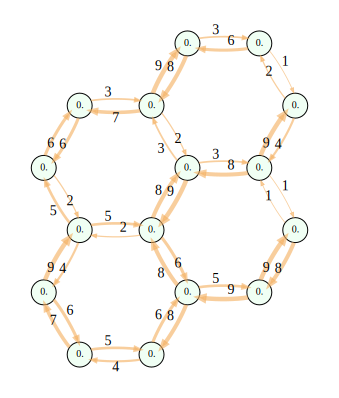

In [78]:
gr = rn.grid_with_positions(2, 2, grid_type="hexagonal")
nw = rn.ResourceNetworkGreedy(gr)
len(gr)

sim = nw.run_simulation(np.zeros(len(nw)), n_iters=1)
svgs = nw.plot_with_states(sim, scale=1.)
svgs[0]

## Тестирование всего

In [15]:
G = nx.DiGraph()
G.add_node(3, pos="lala")
G.add_node(4, pos="lala2")
G.add_edges_from([
    (3, 4, {"weight": 2}),
    (4, 3, {"weight": 3})
])
G.nodes[3]

{'pos': 'lala'}